# Esercitazione 8

The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

 Per calcolare l'integrale, si campiona la distribuzione $|\psi(x)|^2$ con $\psi(x) = e^{-\frac{(x - \mu)^2}{2\sigma^2}} + e^{-\frac{(x + \mu)^2}{2\sigma^2}}$. La distribuzione non è normalizzata, ma questo non è un problema dato che l'algoritmo di Metropolis utilizza rapporti di probabilità per campionare la distribuzione. La probabilità di transizione $T(x_{new}|x_{old})$ è quella uniforme, ad ogni passo si estrae uniformemente un numero casuale tra $x-\delta/2$ e $x+\delta/2$, con $\delta = 7$ in modo da avere un tasso di accettazione all'incirca del 50%. Per il calcolo dell'integrale vengono utilizzati 100 blocchi con 1000 dati per blocco.

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

Ad ogni passo dell'algoritmo di Simulated Annealing si estrae uniformemente un numero casuale tra $x-\delta_{SA}/2$ e $x+\delta_{SA}/2$ con $ \delta_{SA} = 0.1 $. Ogni 100 step, viene cambiata la temperatura, moltiplicando ogni volta per 0.8. La temperatura iniziale è 1. 

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

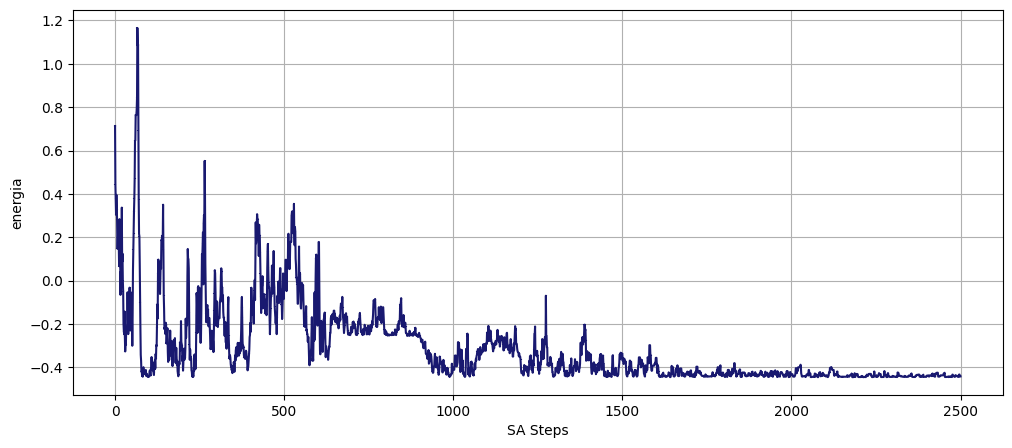

In [10]:
data2=np.loadtxt("output_progressive_energy.out")
num_rows, num_cols = data2.shape

x = [i for i in range(num_rows)]

plt.figure(figsize=(12, 5))

plt.errorbar(x, data2[:, 0], yerr=data2[:, 1], color='midnightblue')

plt.xlabel("SA Steps")
plt.ylabel("energia")
plt.grid(True)
plt.show()

- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps

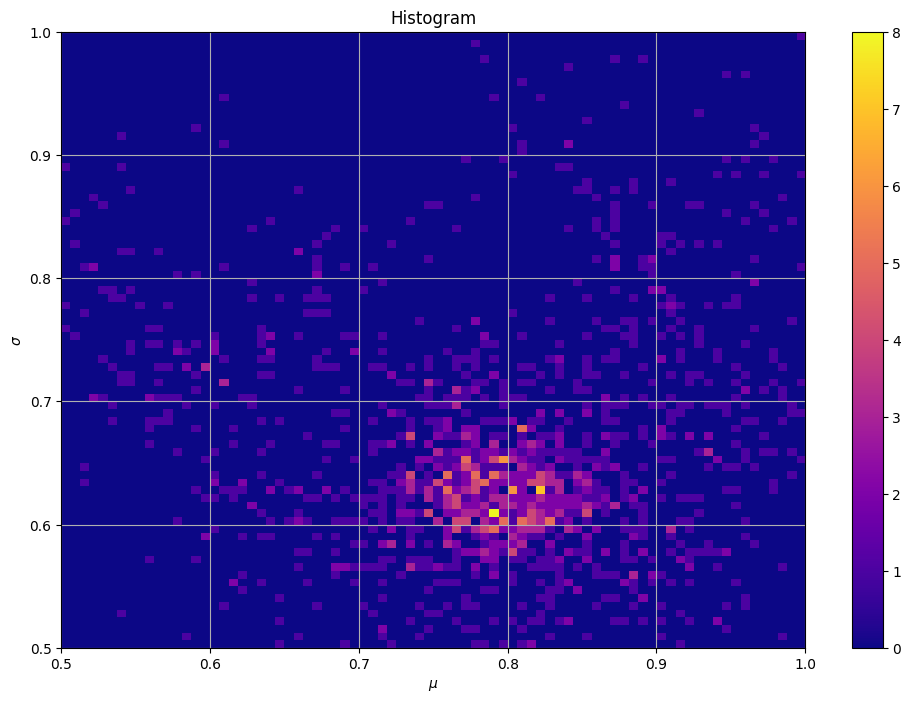

/var/folders/ym/ytzy_nyn4_j1yb9zmx86sgj40000gn/T/ipykernel_7178/904889550.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('plasma', len(unique_temp))


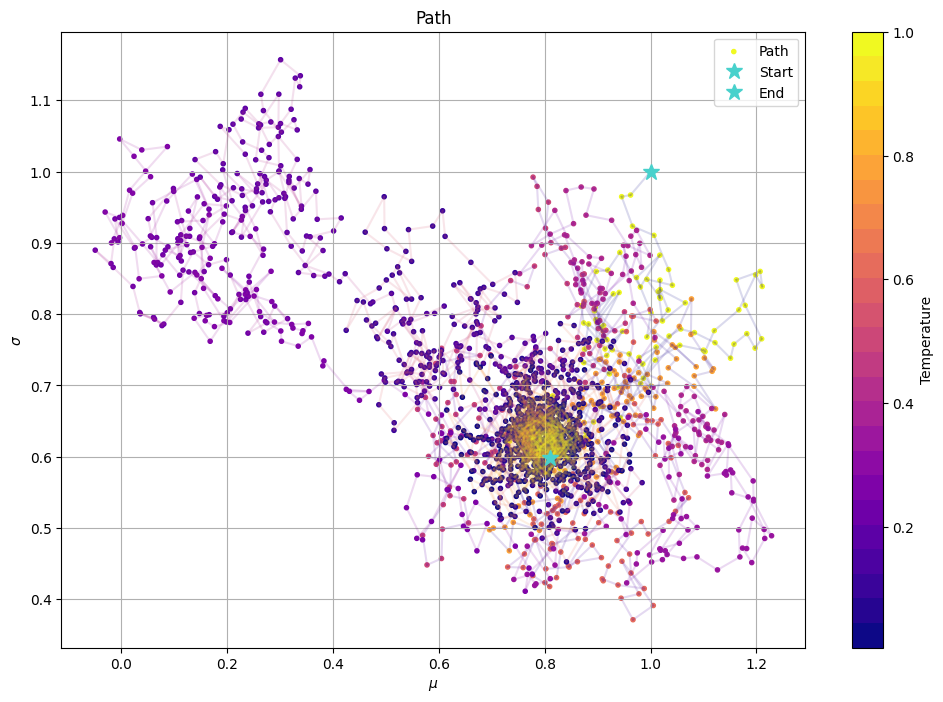

Best mu = 0.809175
Best sigma = 0.598537


In [11]:
import numpy as np
import matplotlib.pyplot as plt

temp, mu, sigma = np.loadtxt("output_parameters.out", unpack=True)

bin_range = [[0.5, 1], [0.5, 1]]
hist, xedges, yedges = np.histogram2d(mu, sigma, bins=80, range=bin_range)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(12, 8))
im = plt.imshow(hist.T, cmap="plasma", origin='lower', extent=extent, aspect='auto')
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Histogram')
plt.colorbar(im)

plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

temp, mu, sigma = np.loadtxt("output_parameters.out", unpack=True)

# Generate a colormap based on unique values in 'temp'
unique_temp = np.unique(temp)
color_map = plt.cm.get_cmap('plasma', len(unique_temp))

# Plot scatter plot with colors based on 'temp'
plt.scatter(mu, sigma, c=temp, cmap=color_map, marker='.', linestyle="-", label="Path")

# Connect successive points with lines
for i in range(len(temp) - 1):
    line_color = color_map(i / len(temp))  # Set color based on position in colormap
    line_alpha = 0.15  # Set transparency (0.0 to 1.0)
    plt.plot([mu[i], mu[i+1]], [sigma[i], sigma[i+1]], color=line_color, alpha=line_alpha)

plt.plot(mu[0], sigma[0], marker='*', markersize=12, color="mediumturquoise", label="Start", linestyle="")
plt.plot(mu[-1], sigma[-1], marker='*', markersize=12, color="mediumturquoise", label="End", linestyle="")

# Add a colorbar to show the mapping of colors to 'temp' values
colorbar = plt.colorbar()
colorbar.set_label('Temperature')

plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Path')

plt.legend()
plt.grid(True)
plt.show()

best_mu = mu[-1]
best_sigma = sigma[-1]

print("Best mu =", best_mu)
print("Best sigma =", best_sigma)

- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>

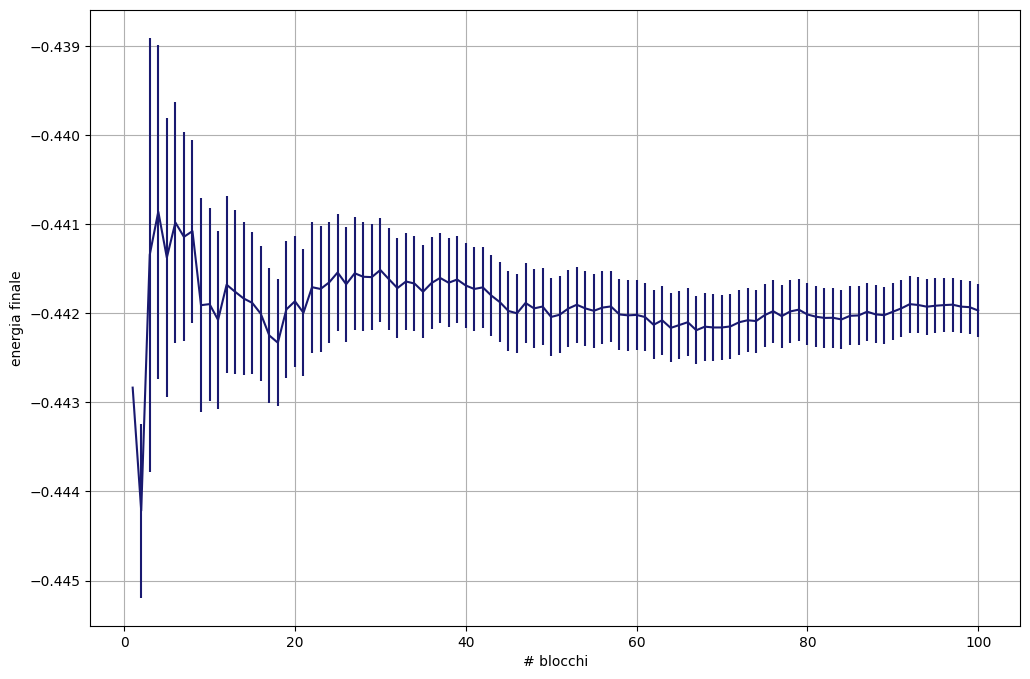

In [12]:
data2=np.loadtxt("output_energy_final.out")

plt.figure(figsize=(12, 8))

plt.errorbar(data2[:, 0], data2[:, 2], yerr=data2[:, 3], color='midnightblue')

plt.xlabel("# blocchi")
plt.ylabel("energia finale")
plt.grid(True)
plt.show()

- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

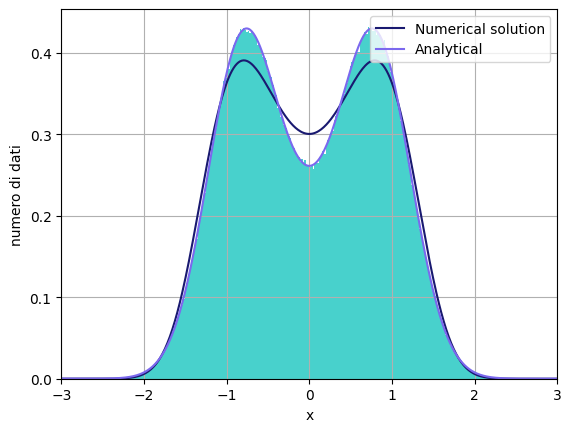

In [14]:
data=np.loadtxt("output_histo.out")

plt.hist(data, 300 ,density=True, color="mediumturquoise")
plt.xlabel("x")
plt.ylabel("numero di dati")
plt.grid(True)

#-------------Numerical and analytical solution-----------------

def Vpot(x):
    return (x**2 - 2.5)*x**2
def PsiSquare(x):
    return (np.exp(-(x-best_mu)**2/(2.0 * best_sigma**2)) + np.exp(-(x+best_mu)**2/(2.0 * best_sigma**2)))**2

hbar = 1
m = 1
a = 10
N = 1000 

x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0]
V = Vpot(x)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

scale = 0.3
plt.plot(x,(psi[0])**2, label='Numerical solution', color="midnightblue")
plt.plot(x, PsiSquare(x)/( a*np.mean(PsiSquare(x)) ), color = 'mediumslateblue', label="Analytical")
plt.xlim(-3,+3)

plt.legend()
plt.show()